In [50]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from scipy.stats import zscore
import seaborn as sns
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [51]:
data = pd.read_csv('nutrientcomposition_new.csv')

In [52]:
data.head(3)

,S.No,Protein,Fat,vitaminC,Fibre,Product
0,725,0.000128,0.131787,0.399502,0.616891,Unknown
1,816,0.000832,0.400516,1.420966,1.054027,"Mountain yam, hawaii, cooked, steamed, without..."
2,804,0.001940,0.096019,0.440585,0.041487,Unknown


In [53]:
Sno_product = data[['S.No' , 'Product']]

In [54]:
data = data.drop(Sno_product , axis = 1)

In [55]:
data.head(3)

,Protein,Fat,vitaminC,Fibre
0,0.000128,0.131787,0.399502,0.616891
1,0.000832,0.400516,1.420966,1.054027
2,0.001940,0.096019,0.440585,0.041487


In [56]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1746 entries, 0 to 1745
Data columns (total 4 columns):
Protein     1746 non-null float64
Fat         1746 non-null float64
vitaminC    1746 non-null float64
Fibre       1746 non-null float64
dtypes: float64(4)
memory usage: 54.6 KB


In [57]:
data.columns

Index(['Protein', 'Fat', 'vitaminC', 'Fibre'], dtype='object')

In [58]:
x = data[['Protein', 'Fat', 'vitaminC', 'Fibre']]

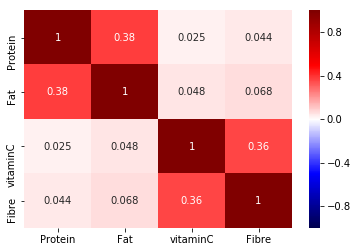

In [59]:
corr = x.corr()

sns.heatmap(corr,cmap='seismic',  annot=True, vmax=1, vmin=-1)

In [60]:
sc = StandardScaler()

In [61]:
x_std =  sc.fit_transform(x)          

In [62]:
x_std

array([[-1.47116119, -1.21100545, -0.80274143, -0.45307156],
       [-1.47003895, -0.78743324,  0.83509057,  0.24445245],
       [-1.46827084, -1.26738225, -0.73686725, -1.37122679],
       ...,
       [ 3.87744907,  0.45883565,  1.02398754, -0.96639718],
       [ 4.42089526,  3.29331658, -0.28116602,  0.24564108],
       [ 4.93568852,  4.85356815, -0.29066182, -1.27620598]])

In [63]:
cov_matrix = np.cov(x_std.T)
print('Covariance Matrix \n%s', cov_matrix)

Covariance Matrix 
%s [[1.00057307 0.38253077 0.02540316 0.04384809]
 [0.38253077 1.00057307 0.04829969 0.06811834]
 [0.02540316 0.04829969 1.00057307 0.36167341]
 [0.04384809 0.06811834 0.36167341 1.00057307]]


In [64]:
eig_vals, eig_vecs = np.linalg.eig(cov_matrix)
print('Eigen Vectors \n%s', eig_vecs)
print('\n Eigen Values \n%s', eig_vals)

Eigen Vectors 
%s [[-0.5136229  -0.49012979 -0.70287794 -0.04389671]
 [-0.53984503 -0.45263957  0.70967078  0.00722082]
 [-0.45922822  0.54059078  0.00263582 -0.70488588]
 [-0.48359933  0.51249568 -0.04819792  0.70792431]]

 Eigen Values 
%s [1.46663112 1.2799764  0.61725689 0.63842786]


In [65]:
print("Eigen Values:")
pd.DataFrame(eig_vals).transpose()

Eigen Values:


,0,1,2,3
0,1.466631,1.279976,0.617257,0.638428


In [66]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print("Cumulative Variance Explained", cum_var_exp)

Cumulative Variance Explained [ 36.64477812  68.6258608   84.57741591 100.        ]


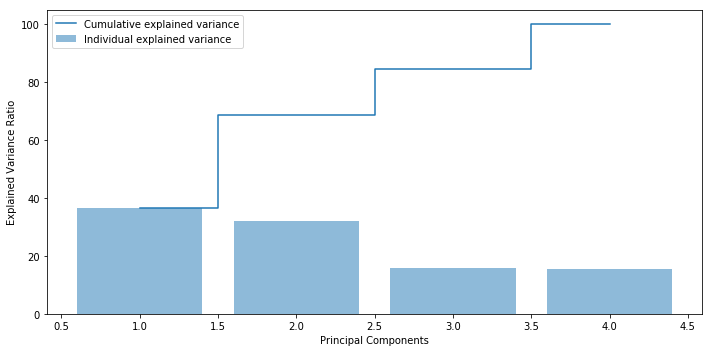

In [67]:
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()

In [68]:
x_reduced = PCA(n_components=2).fit_transform(x_std)
x_reduced_f = PCA(n_components=2).fit(x_std)
a = x_reduced_f.components_
a = a.T
a

array([[ 0.5136229 ,  0.49012979],
       [ 0.53984503,  0.45263957],
       [ 0.45922822, -0.54059078],
       [ 0.48359933, -0.51249568]])

In [69]:
x_reduced = pd.DataFrame(data = x_reduced)

In [70]:
x_reduced.head(2)

,0,1
0,-1.997124,-0.603057
1,-0.678423,-1.653656


In [71]:
from sklearn.cluster import KMeans
cluster = KMeans( n_clusters = 3, random_state = 2354 )
cluster.fit(x_reduced)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=2354, tol=0.0001, verbose=0)

In [72]:
centroids = cluster.cluster_centers_
centroids

array([[ 0.74485848, -1.28817797],
       [ 1.02256316,  1.11360775],
       [-0.95479825,  0.07984688]])

In [73]:
centroid_df = pd.DataFrame(centroids, columns = list(x_reduced) )
centroid_df

,0,1
0,0.744858,-1.288178
1,1.022563,1.113608
2,-0.954798,0.079847


In [74]:
prediction=cluster.predict(x_reduced)
x_reduced["GROUP"] = prediction 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001AF0D382EF0>,
      dtype=object)

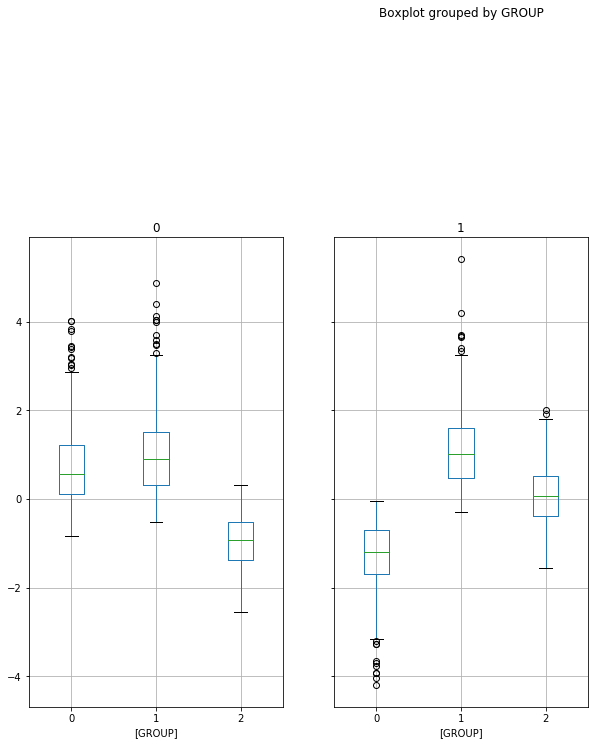

In [75]:
x_reduced.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))

In [76]:
x_reduced['Product'] = Sno_product.Product

In [78]:
x_reduced.to_csv('nutrients_final.csv' , index = False)